In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

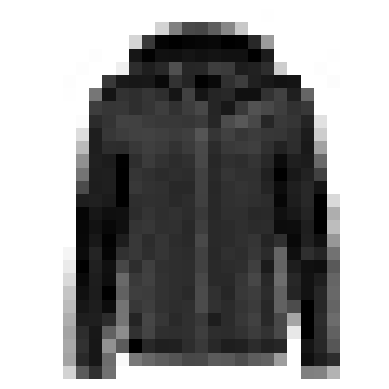

In [8]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [19]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, AveragePooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.callbacks import History
from keras.callbacks import LearningRateScheduler
from keras.optimizers import Adam

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model_full = Sequential()
model_full.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model_full.add(AveragePooling2D(pool_size=(2, 2), padding='valid'))
model_full.add(Conv2D(64, 3, padding='same', activation='relu'))
model_full.add(AveragePooling2D(pool_size=(2, 2), padding='valid'))
model_full.add(Flatten())
model_full.add(keras.layers.Dense(300)),
model_full.add(keras.layers.BatchNormalization()),
model_full.add(keras.layers.Activation("relu")),
model_full.add(keras.layers.Dropout(0.5)),
model_full.add(keras.layers.Dense(100)),
model_full.add(keras.layers.BatchNormalization()),
model_full.add(keras.layers.Activation("relu")),
model_full.add(keras.layers.Dropout(0.5)),
model_full.add(keras.layers.Dense(50)),
model_full.add(keras.layers.BatchNormalization()),
model_full.add(keras.layers.Activation("relu")),
model_full.add(keras.layers.Dropout(0.5)),
model_full.add(keras.layers.Dense(10, activation="softmax"))

model_full.summary()

early_stopping = keras.callbacks.EarlyStopping(patience=5, monitor="val_loss")
model_full.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history_full = model_full.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[early_stopping])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 average_pooling2d_1 (Averag  (None, 7, 7, 64)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 300)               9

In [10]:
model_full.evaluate(X_test, y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.2216 - accuracy: 0.9292


[0.2216334193944931, 0.9291999936103821]

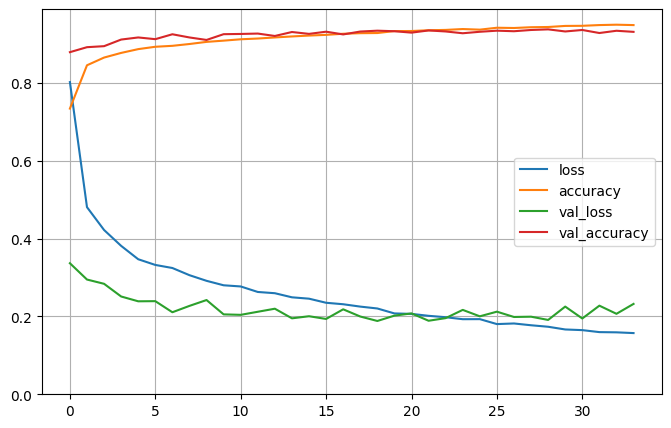

In [ ]:
pd.DataFrame(history_full.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, )
plt.show()